# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:

$
\mathbf{Ax}=\mathbf{b}
$

gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$


***Zadanie 1***

1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$.


In [2]:
m = [10,20,50,100,1000]
def generate_lists_of_A_b_x():
    A = [0,0,0,0,0]
    b = [0,0,0,0,0]
    x = []
    A[0], b[0] = main.random_matrix_Ab(10)
    A[1], b[1] = main.random_matrix_Ab(20)
    A[2], b[2] = main.random_matrix_Ab(50)
    A[3], b[3] = main.random_matrix_Ab(100)
    A[4], b[4] = main.random_matrix_Ab(1000)
    for A_iter, b_iter in zip(A,b):
        x.append(np.linalg.solve(A_iter,b_iter))
    return A, b, x
A, b, x = generate_lists_of_A_b_x()

***Zadanie 2***

1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*.

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*.

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników?


Uśredniam operacje wykonując je na 50 zestawach losowych macierzy:

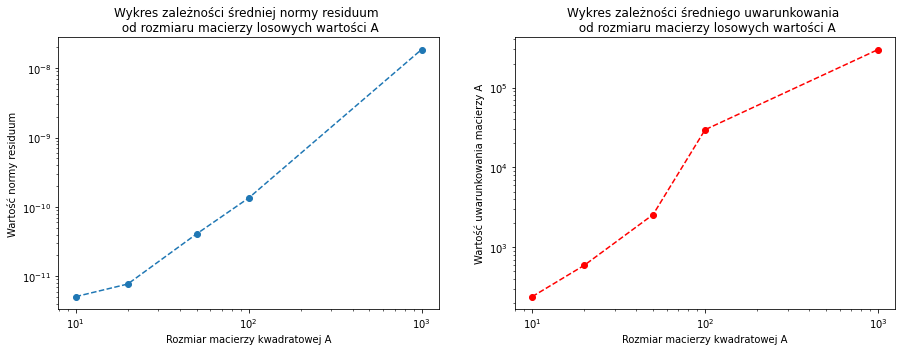

In [3]:
x_norm_list = []
x_cond_list = []
for k in range(50):
    A, b, x = generate_lists_of_A_b_x()
    x_norm = []
    x_cond = []
    for A_iter, b_iter, x_iter in zip(A,b,x):
        x_norm.append(main.residual_norm(A_iter,x_iter,b_iter))
        x_cond.append(np.linalg.cond(A_iter))
    x_norm_list.append(x_norm)
    x_cond_list.append(x_cond)
x_norm = np.mean(x_norm_list, axis=0)
x_cond = np.mean(x_cond_list, axis=0)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].loglog(m,x_norm,'o--')
ax[0].set_title('Wykres zależności średniej normy residuum \n od rozmiaru macierzy losowych wartości A')
ax[0].set_xlabel('Rozmiar macierzy kwadratowej A')
ax[0].set_ylabel('Wartość normy residuum')
ax[1].loglog(m,x_cond,'ro--')
ax[1].set_title('Wykres zależności średniego uwarunkowania \n od rozmiaru macierzy losowych wartości A')
ax[1].set_xlabel('Rozmiar macierzy kwadratowej A')
ax[1].set_ylabel('Wartość uwarunkowania macierzy A')
plt.show()

Z powyższych wykresów wyraźnie widać, że błąd wyznaczania rozwiązań układu zwiększa się wraz z rozmiarem macierzy A układu. Jakość obliczeń zmniejsza się wraz z wzrostem wskaźnika uwarunkowania macierzy A. Aby znaleźć odpowiedź na pytanie czy zakres wartości w macierzy ma wpływ na jakość otrzymanych wyników generuję wykres dla macierzy o rozmiarach 100 x 100:

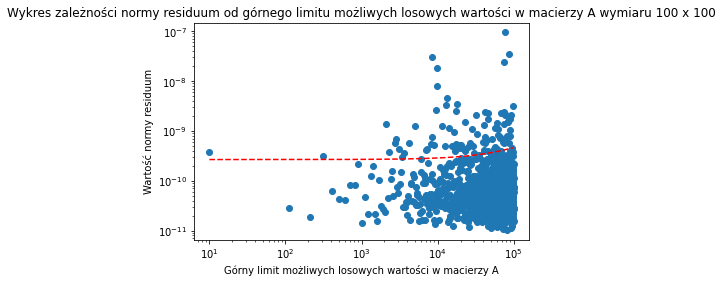

In [4]:
A = []
b = []
x = []
x_norm = []
lt = []
for limit in np.linspace(10,100000,1000):
    A_1, b_1 = main.random_matrix_Ab(100,limit)
    A.append(A_1)
    b.append(b_1)
    lt.append(limit)
for A_iter, b_iter in zip(A,b):
    x.append(np.linalg.solve(A_iter,b_iter))
for A_iter, b_iter, x_iter in zip(A,b,x):
    x_norm.append(main.residual_norm(A_iter,x_iter,b_iter))
plt.scatter(lt,x_norm)
z = np.polyfit(lt, x_norm, 1)
p = np.poly1d(z)
plt.plot(lt,p(lt),"r--")
plt.xscale('log')
plt.yscale('log')
plt.title('Wykres zależności normy residuum od górnego limitu możliwych losowych wartości w macierzy A wymiaru 100 x 100')
plt.xlabel('Górny limit możliwych losowych wartości w macierzy A')
plt.ylabel('Wartość normy residuum')
plt.show()

Linia trendu na wykresie nie jest jednoznaczna - przy kolejnych wywołaniach zachowuje się w różny sposób (zbliżony do linii prostej) co może świadczyć, o tym, że średnia wartość błędu nie jest zależna od górnego limitu losowych wartości w macierzy A. Z drugiej strony przy każdym wywołaniu wyraźnie widać, że górne wartości błędu zawsze rosną wraz z wzrostem limitu, co może prowadzić do wniosku, że wraz z wzrostem limitu podatność rozwiązania na błąd także rośnie.

***Zadanie 3***
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod:

In [5]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)

print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.48074070e+00 1.29219214e-16 7.69636854e-34]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych.

    W celu inicjalizacji takich wektorów zaimplementuje funkcje:
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej.

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania.

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy.




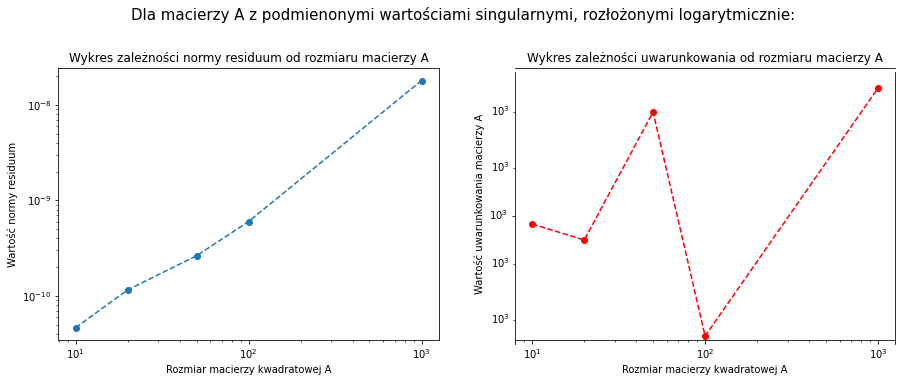

In [6]:
A, b, x = generate_lists_of_A_b_x()
log_sing = []
order_sing_gre = []
order_sing_low = []
log_sing_cond = []
log_sing_norm = []
for size in m:
    log_sing.append(main.log_sing_value(size,0,3))
    order_sing_gre.append(main.order_sing_value(size,site = 'gre'))
    order_sing_low.append(main.order_sing_value(size,site = 'low'))
for A_iter, b_iter, log_sing_iter in zip(A,b,log_sing):
    A_log_sing_elem = main.create_matrix_from_A(A_iter,log_sing_iter)
    log_sing_cond.append(np.linalg.cond(A_log_sing_elem))
    x = np.linalg.solve(A_log_sing_elem,b_iter)
    log_sing_norm.append(main.residual_norm(A_log_sing_elem,x,b_iter))
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Dla macierzy A z podmienonymi wartościami singularnymi, rozłożonymi logarytmicznie:',fontsize = 15,y = 1.05)
ax[0].loglog(m,log_sing_norm,'o--')
ax[0].set_title('Wykres zależności normy residuum od rozmiaru macierzy A')
ax[0].set_ylabel('Wartość normy residuum')
ax[0].set_xlabel('Rozmiar macierzy kwadratowej A')
ax[1].loglog(m,log_sing_cond,'ro--')
ax[1].set_title('Wykres zależności uwarunkowania od rozmiaru macierzy A')
ax[1].set_ylabel('Wartość uwarunkowania macierzy A')
ax[1].set_xlabel('Rozmiar macierzy kwadratowej A')
plt.show()

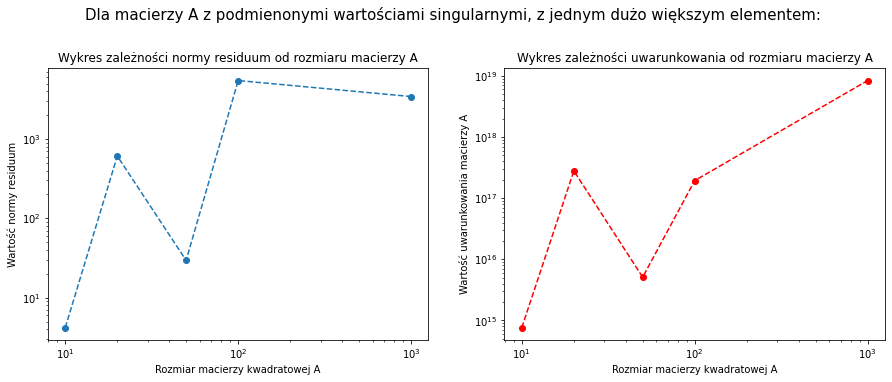

In [7]:
order_sing_gre_cond = []
order_sing_gre_norm = []
for A_iter, b_iter, order_sing_gre_iter in zip(A,b,order_sing_gre):
    A_order_sing_gre_elem = main.create_matrix_from_A(A_iter,order_sing_gre_iter)
    order_sing_gre_cond.append(np.linalg.cond(A_order_sing_gre_elem))
    x = np.linalg.solve(A_order_sing_gre_elem,b_iter)
    order_sing_gre_norm.append(main.residual_norm(A_order_sing_gre_elem,x,b_iter))
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Dla macierzy A z podmienonymi wartościami singularnymi, z jednym dużo większym elementem:',
             fontsize = 15,y = 1.05)
ax[0].loglog(m,order_sing_gre_norm,'o--')
ax[0].set_title('Wykres zależności normy residuum od rozmiaru macierzy A')
ax[0].set_ylabel('Wartość normy residuum')
ax[0].set_xlabel('Rozmiar macierzy kwadratowej A')
ax[1].loglog(m,order_sing_gre_cond,'ro--')
ax[1].set_title('Wykres zależności uwarunkowania od rozmiaru macierzy A')
ax[1].set_ylabel('Wartość uwarunkowania macierzy A')
ax[1].set_xlabel('Rozmiar macierzy kwadratowej A')
plt.show()

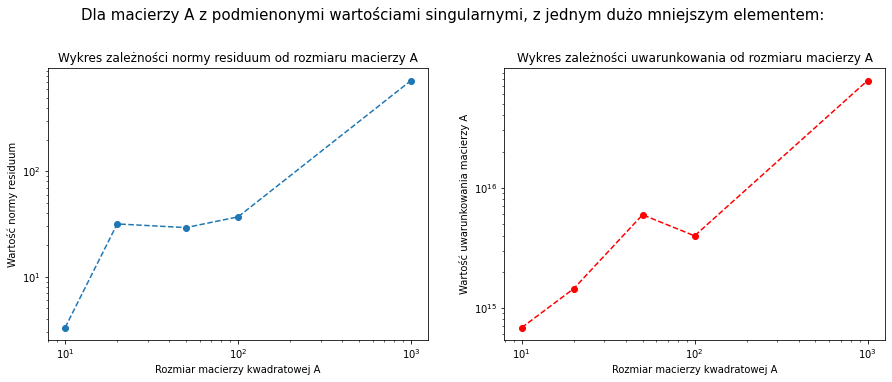

In [8]:
order_sing_low_cond = []
order_sing_low_norm = []
for A_iter, b_iter, order_sing_low_iter in zip(A,b,order_sing_low):
    A_order_sing_low_elem = main.create_matrix_from_A(A_iter,order_sing_low_iter)
    order_sing_low_cond.append(np.linalg.cond(A_order_sing_low_elem))
    x = np.linalg.solve(A_order_sing_low_elem,b_iter)
    order_sing_low_norm.append(main.residual_norm(A_order_sing_low_elem,x,b_iter))
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Dla macierzy A z podmienonymi wartościami singularnymi, z jednym dużo mniejszym elementem:',
             fontsize = 15,y = 1.05)
ax[0].loglog(m,order_sing_low_norm,'o--')
ax[0].set_title('Wykres zależności normy residuum od rozmiaru macierzy A')
ax[0].set_ylabel('Wartość normy residuum')
ax[0].set_xlabel('Rozmiar macierzy kwadratowej A')
ax[1].loglog(m,order_sing_low_cond,'ro--')
ax[1].set_title('Wykres zależności uwarunkowania od rozmiaru macierzy A')
ax[1].set_ylabel('Wartość uwarunkowania macierzy A')
ax[1].set_xlabel('Rozmiar macierzy kwadratowej A')
plt.show()

Widać, że wskaźnik uwarunkowania macierzy A ma wpływ na normę residuum czyli dokładność rozwiązania układu równań. Z powyższych wykresów wynika również, że macierz posiadająca jedną bardzo dużo większą lub bardzo mało mniejszą wartość singularną posiada ogromny wskaźnik uwarunkowania a błąd przy rozwiązywaniu układu jest również dużo większy. Dla macierzy z wartościami singularnymi rozłożonymi logarytmicznie uwarunkowanie jest bardzo podobne niezależnie od rozmiaru macierzy A, a błąd jest podobny do przypadku gdy macierz posiada losowe wartości (w takich samych przedziałach - tutaj od 0 do 1000).

Znając wartości singularne można obliczyć wartość wskaźnika uwarunkowania macierzy "kappa" jako iloraz największej wartości singularnej do najmniejszej wartości singularnej. Stąd też od razu widać dlaczego wartości wskaźnika uwarunkowania przyjmują podobne wartości gdy największa i najmniejsza wartość singularna jest stała niezależnie od rozmiaru macierzy A, oraz dlaczego są ogromne gdy jedna z wartości singularnych macierzy jest bardzo duża lub bardzo mała w stosunku do pozostałych.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)